In [13]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [5]:
df = pd.read_csv("synthetic_covid19_data (1).csv")
df

,date,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_tests,new_tests,positive_rate,...,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence
0,2021-11-19,Asia,India,6423388,2490,107051,323,60016385,7386,0.904377,...,69.259331,1241418161,67.394702,49.883751,8.649395,16.052063,44313.199955,20.827286,177.832655,16.296474
1,2021-09-12,North America,Russia,6550634,6980,481184,697,28666409,6862,0.525850,...,7.185287,114516392,694.409929,30.126823,8.957854,4.423022,8196.945011,20.478579,470.991420,8.579170
2,2020-04-20,Europe,Canada,4304572,9134,15116,325,80352550,40108,0.791575,...,14.823246,1152898402,784.464729,22.648063,9.336778,18.776372,52607.000057,11.924664,415.880908,14.989789
3,2022-10-16,Asia,Germany,2234489,7661,20045,624,89212990,91788,0.115291,...,70.007502,1342525124,403.467508,42.951109,5.321894,10.526520,23297.985037,4.591400,643.510444,18.084096
4,2021-05-15,Europe,USA,9958614,1724,419543,824,5364240,75023,0.927643,...,28.972334,744943966,182.869692,26.414731,19.321761,15.889173,56126.828895,5.431330,451.846790,5.971409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2022-11-09,Asia,France,7085904,1537,380572,854,38716025,79552,0.197973,...,98.890603,629900904,764.616886,33.458451,10.699616,9.350358,2098.653639,4.346562,493.921655,6.836992
2996,2020-01-24,North America,India,6699744,397,277354,353,27906787,38233,0.920767,...,26.402506,970688939,691.752546,43.324178,15.298106,8.681226,4533.613663,30.872835,438.493670,17.708803
2997,2021-02-08,Asia,France,9024327,5680,442726,74,88886044,22695,0.441796,...,16.666702,146193923,650.365284,31.532917,11.588981,19.658565,63901.494497,16.760837,777.073028,3.726194
2998,2020-02-05,Asia,India,2801445,9355,364225,801,63500569,90488,0.742791,...,54.633328,485038295,552.083660,26.648227,5.098328,10.351321,25728.132347,33.450083,198.230609,11.864297


In [6]:
df.shape

(3000, 27)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     3000 non-null   object 
 1   continent                3000 non-null   object 
 2   location                 3000 non-null   object 
 3   total_cases              3000 non-null   int64  
 4   new_cases                3000 non-null   int64  
 5   total_deaths             3000 non-null   int64  
 6   new_deaths               3000 non-null   int64  
 7   total_tests              3000 non-null   int64  
 8   new_tests                3000 non-null   int64  
 9   positive_rate            3000 non-null   float64
 10  tests_per_case           3000 non-null   float64
 11  total_vaccinations       3000 non-null   int64  
 12  people_vaccinated        3000 non-null   int64  
 13  people_fully_vaccinated  3000 non-null   int64  
 14  hosp_patients           

In [8]:
df["date"] = pd.to_datetime(df["date"])
df["date"]

0      2021-11-19
1      2021-09-12
2      2020-04-20
3      2022-10-16
4      2021-05-15
          ...    
2995   2022-11-09
2996   2020-01-24
2997   2021-02-08
2998   2020-02-05
2999   2021-06-21
Name: date, Length: 3000, dtype: datetime64[ns]

In [12]:
time_trends = df.groupby("date").agg({
    "new_cases": "sum",
    "new_deaths":"sum",
    "new_tests":"sum",
    "total_vaccinations": "sum"
}).reset_index()
time_trends

,date,new_cases,new_deaths,new_tests,total_vaccinations
0,2020-01-01,10095,914,12558,107608444
1,2020-01-02,24932,2630,319950,196169106
2,2020-01-03,4818,1023,47747,68879807
3,2020-01-04,6242,8,89966,23717838
4,2020-01-05,23365,1997,123717,138009020
...,...,...,...,...,...
1023,2022-12-27,9870,737,16749,60746719
1024,2022-12-28,7982,137,10866,64364431
1025,2022-12-29,11268,1184,108104,64964290
1026,2022-12-30,32445,4254,349852,292638575


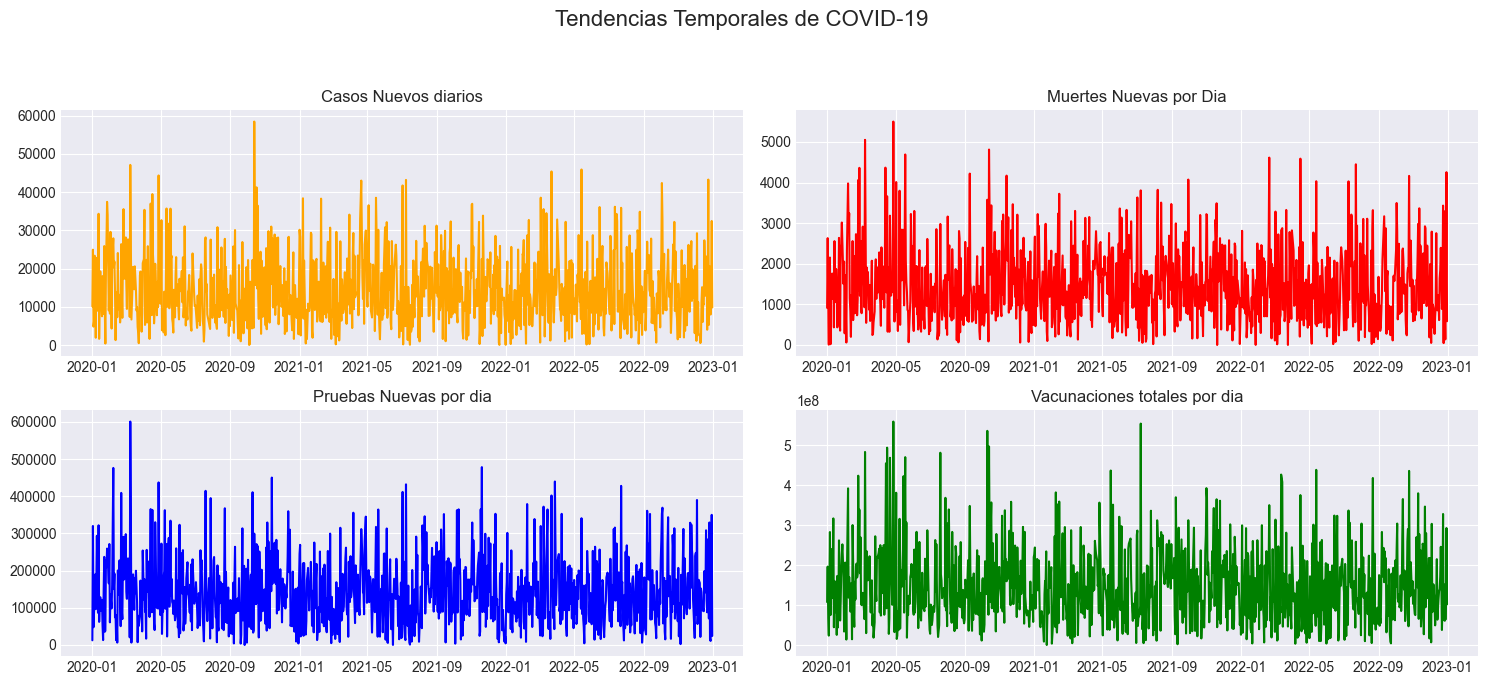

In [15]:
# Graficar los casos por tiempo 

plt.style.use("seaborn-v0_8-darkgrid")

fig, axes = plt.subplots(2,2, figsize = (15,10))
fig.suptitle("Tendencias Temporales de COVID-19 ", fontsize = 16) 

axes[0,0].plot(time_trends["date"], time_trends["new_cases"], color = "orange")
axes[0,0].set_title("Casos Nuevos diarios")

axes[0,1].plot(time_trends["date"], time_trends["new_deaths"], color = "red")
axes[0,1].set_title("Muertes Nuevas por Dia")

axes[1,0].plot(time_trends["date"], time_trends["new_tests"], color = "blue")
axes[1,0].set_title("Pruebas Nuevas por dia")

axes[1,1].plot(time_trends["date"], time_trends["total_vaccinations"], color = "green")
axes[1,1].set_title("Vacunaciones totales por dia")

plt.tight_layout(rect=[0, 0.3, 1, 0.95])
plt.show()

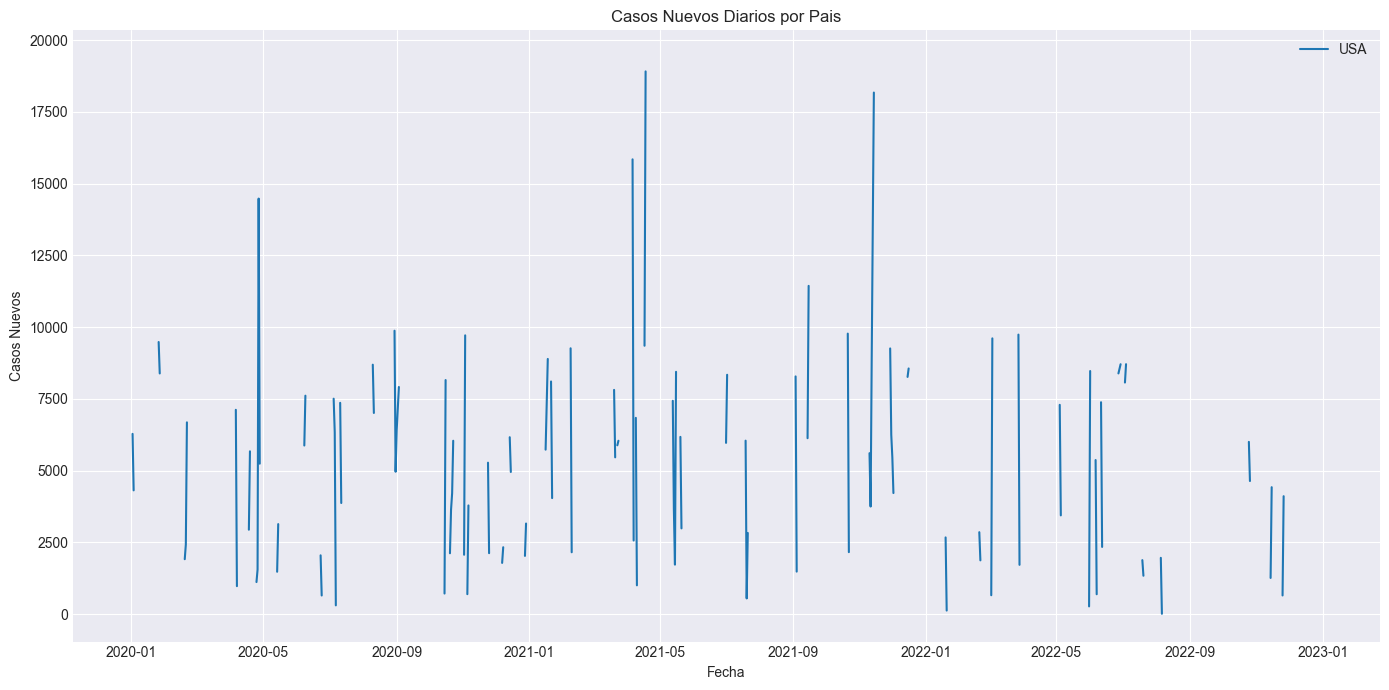

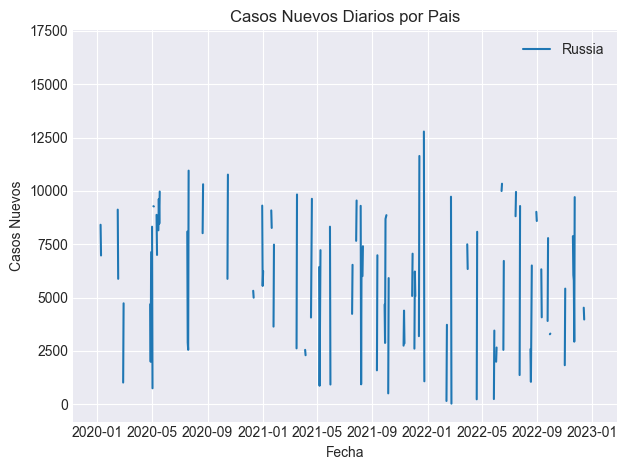

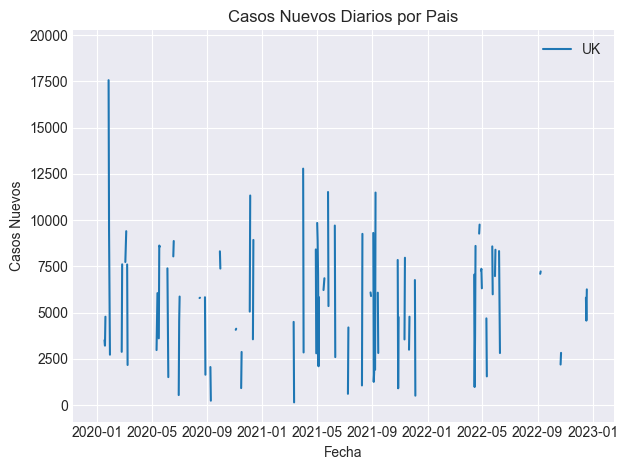

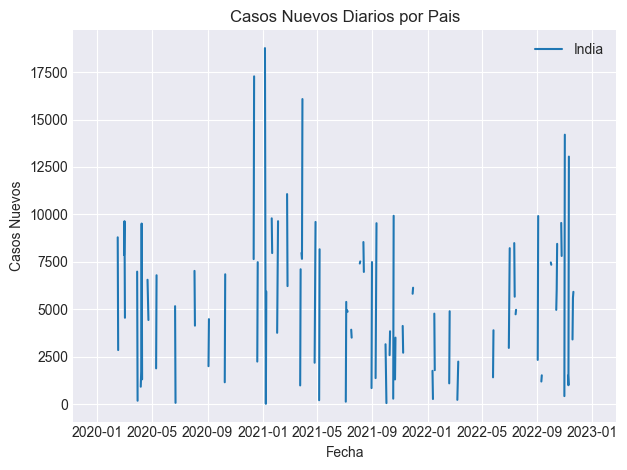

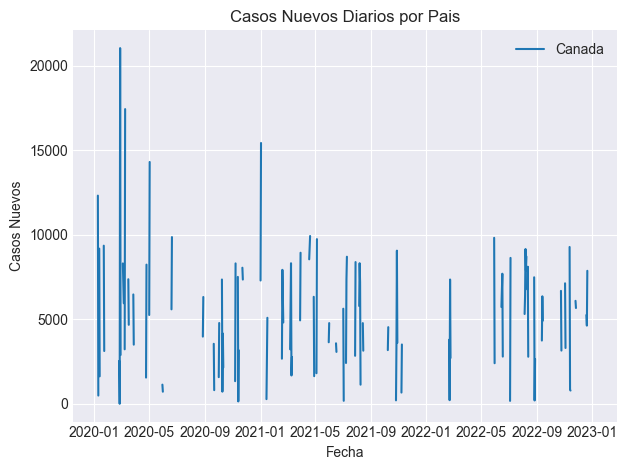

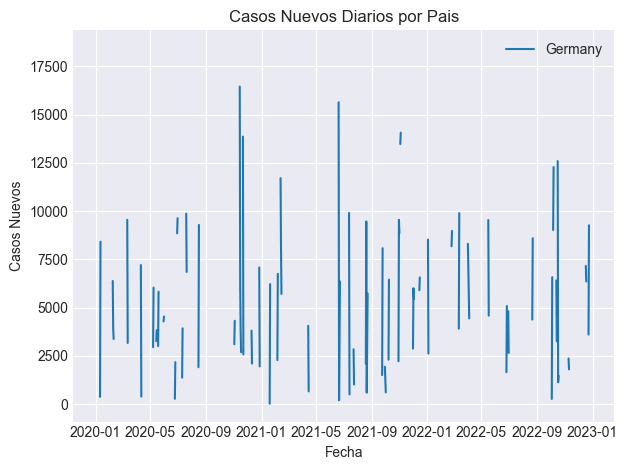

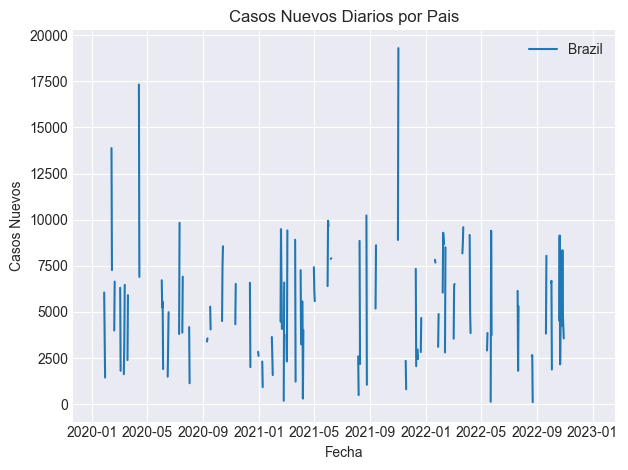

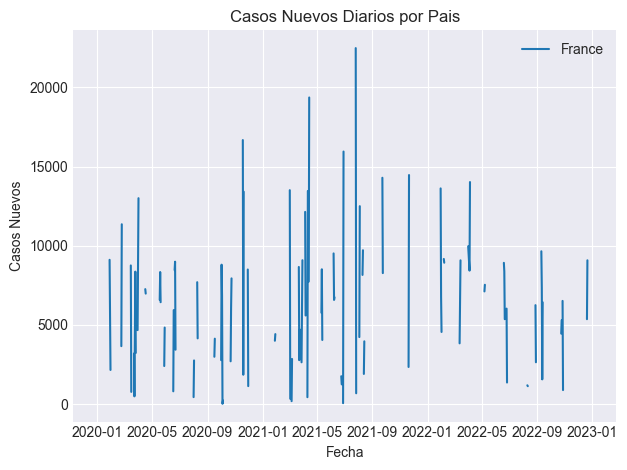

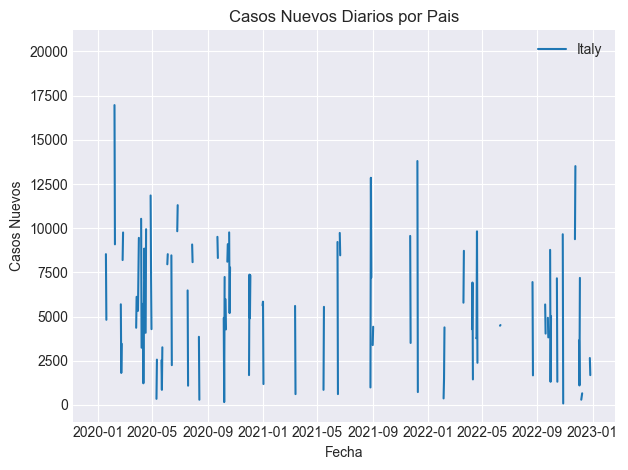

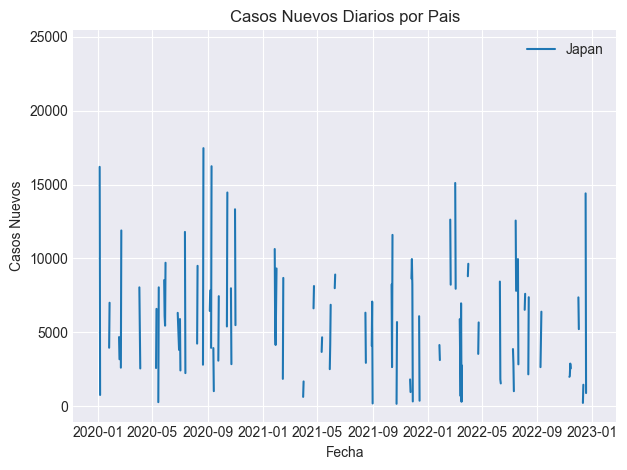

In [29]:
paises = df["location"]
lista_paises = paises.tolist()
paises_unicos = list(set(lista_paises))
paises_unicos

grupo_paises = df.groupby(["date", "location"])["new_cases"].sum().reset_index()

pivot_paises = grupo_paises.pivot(index="date", columns="location", values="new_cases")

plt.figure(figsize=(14,7))

for pais in paises_unicos:
    
    plt.plot(pivot_paises.index, pivot_paises[pais], label=pais)
    
    plt.title("Casos Nuevos Diarios por Pais")
    plt.xlabel("Fecha")
    plt.ylabel("Casos Nuevos")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()    


In [ ]:
#Positividad por Pais 

positividad_por_pais = df.groupby("location")["positive_rate"].mean().sort_values(ascending=False)

location
Germany    0.531930
UK         0.514578
Canada     0.511189
France     0.510577
USA        0.505990
Brazil     0.496939
India      0.495264
Japan      0.494895
Russia     0.484973
Italy      0.484326
Name: positive_rate, dtype: float64

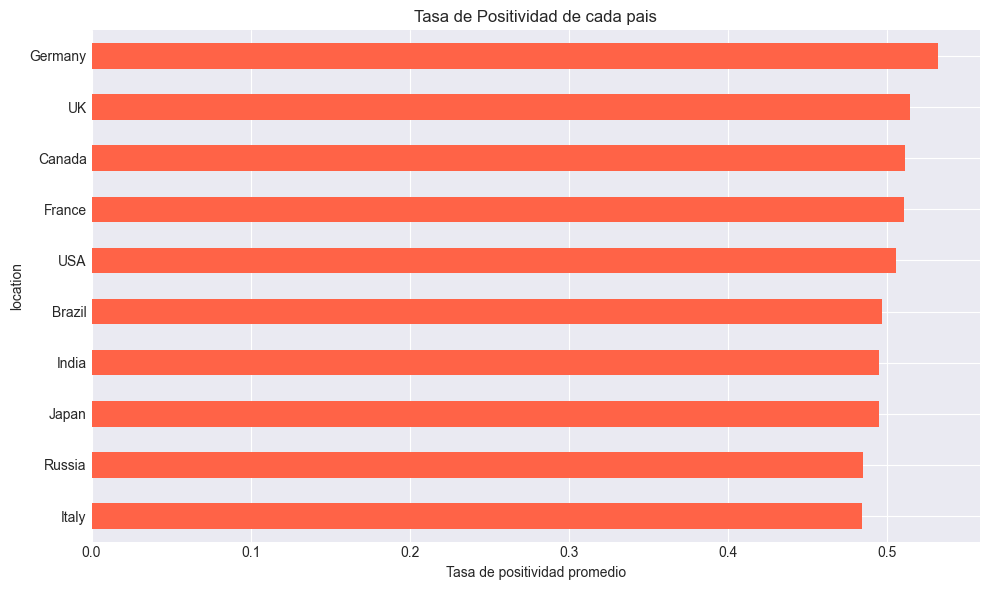

In [31]:
plt.figure(figsize=(10,6))
positividad_por_pais.plot(kind="barh", color="tomato")
plt.xlabel("Tasa de positividad promedio")
plt.title("Tasa de Positividad de cada pais")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()